<a href="https://colab.research.google.com/github/geopayme/Android-Merchant-App/blob/master/InfinityTensor_4D_CurvedSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

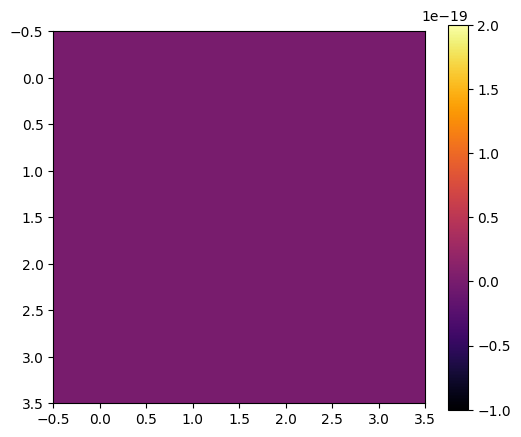

In [1]:

# 🔼 Infinity Tensor Contraction in Curved Space — Upgrade v2

!pip install sympy matplotlib numpy --quiet

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, IndexedBase

DIM = 4
r = symbols('r')

g_upper = np.array([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1/r, 0],
    [0, 0, 0, -1/(r**2)]
], dtype=object)

hbar_val = 1.05e-34
r_val = 1.5

nu_tensor = np.zeros((DIM, DIM, DIM, DIM))
phi_tensor = np.zeros((DIM, DIM, DIM, DIM))
for μ in range(DIM):
    for ν in range(DIM):
        for α in range(DIM):
            for β in range(DIM):
                idx_sum = μ + ν + α + β
                nu_tensor[μ, ν, α, β] = (1 + idx_sum) * 1e14
                phi_tensor[μ, ν, α, β] = (1 + idx_sum) * 1e-19

fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.imshow(np.zeros((DIM, DIM)), cmap='inferno', vmin=-1e-19, vmax=2e-19)
fig.colorbar(cax)

def contract_tensor(g, tensor):
    K_ab = np.zeros((DIM, DIM))
    for μ in range(DIM):
        for ν in range(DIM):
            for α in range(DIM):
                for β in range(DIM):
                    K_ab[α, β] += float(g[μ, ν]) * tensor[μ, ν, α, β]
    return K_ab

def update(frame):
    redshift = 1.0 - frame * 0.02
    e_tensor = hbar_val * redshift * nu_tensor
    k_tensor = e_tensor - phi_tensor

    g_numeric = np.array([
        [1, 0, 0, 0],
        [0, -1, 0, 0],
        [0, 0, -1/r_val, 0],
        [0, 0, 0, -1/(r_val**2)]
    ])
    contracted_k = contract_tensor(g_numeric, k_tensor)
    cax.set_array(contracted_k)
    ax.set_title(f"Contracted Emission Tensor K[αβ] (Redshift: {redshift:.2f})")
    return [cax]

ani = FuncAnimation(fig, update, frames=30, interval=300, blit=False)
plt.show()
